# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import os
from scipy import stats
from scipy.stats import linregress
from pprint import pprint

# Import API key
from api_keys import weather_api_key
temp_units = 'imperial'

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Set URL
query_url = f"http://api.openweathermap.org/data/2.5/weather?appid={weather_api_key}&units={temp_units}&q="

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

610

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
city_two = []
cloudinesses = []
dates = []
humidities = []
lats = []
lngs = []
max_temps = []
wind_speeds = []
countries = []

# City and Set Number
city_num = 0
set_num = 1
# loops for creating dataframe columns
for city in cities:
    try:
        response = requests.get(query_url + city.replace(" ","&")).json()
        cloudinesses.append(response['clouds']['all'])
        countries.append(response['sys']['country'])
        dates.append(response['dt'])
        humidities.append(response['main']['humidity'])
        lats.append(response['coord']['lat'])
        lngs.append(response['coord']['lon'])
        max_temps.append(response['main']['temp_max'])
        wind_speeds.append(response['wind']['speed'])
        if city_num > 48:
            city_num = 1
            set_num += 1
            city_two.append(city)
        else:
            city_num += 1
            city_two.append(city)
        print(f"Processing City Number {city_num} of set number {set_num}| {city}")
    except:
        print('no city found for this one')
print("------------------------------\nData Retrieval Complete\n------------------------------")

no city found for this one
Processing City Number 1 of set number 1| haines junction
Processing City Number 2 of set number 1| tuktoyaktuk
Processing City Number 3 of set number 1| houston
Processing City Number 4 of set number 1| sackville
Processing City Number 5 of set number 1| carnarvon
no city found for this one
Processing City Number 6 of set number 1| busselton
Processing City Number 7 of set number 1| arraial do cabo
Processing City Number 8 of set number 1| burnie
Processing City Number 9 of set number 1| cape town
Processing City Number 10 of set number 1| barrow
Processing City Number 11 of set number 1| hobyo
Processing City Number 12 of set number 1| hilo
Processing City Number 13 of set number 1| hervey bay
Processing City Number 14 of set number 1| lucapa
Processing City Number 15 of set number 1| souillac
Processing City Number 16 of set number 1| boyolangu
Processing City Number 17 of set number 1| cidreira
Processing City Number 18 of set number 1| bowen
Processing C

Processing City Number 4 of set number 4| beringovskiy
no city found for this one
Processing City Number 5 of set number 4| bubaque
no city found for this one
Processing City Number 6 of set number 4| vangaindrano
Processing City Number 7 of set number 4| sungaipenuh
Processing City Number 8 of set number 4| praia
Processing City Number 9 of set number 4| lompoc
Processing City Number 10 of set number 4| vila franca do campo
Processing City Number 11 of set number 4| nome
Processing City Number 12 of set number 4| saurimo
Processing City Number 13 of set number 4| tasiilaq
Processing City Number 14 of set number 4| tigzirt
Processing City Number 15 of set number 4| east london
Processing City Number 16 of set number 4| leningradskiy
Processing City Number 17 of set number 4| punta arenas
no city found for this one
Processing City Number 18 of set number 4| half moon bay
Processing City Number 19 of set number 4| bluff
Processing City Number 20 of set number 4| temirtau
Processing City 

Processing City Number 9 of set number 7| qui nhon
Processing City Number 10 of set number 7| hirara
Processing City Number 11 of set number 7| krishnarajasagara
Processing City Number 12 of set number 7| nacimiento
Processing City Number 13 of set number 7| petropavlovsk-kamchatskiy
no city found for this one
Processing City Number 14 of set number 7| pangnirtung
Processing City Number 15 of set number 7| iberia
Processing City Number 16 of set number 7| oxapampa
Processing City Number 17 of set number 7| kodiak
Processing City Number 18 of set number 7| qaqortoq
Processing City Number 19 of set number 7| puerto del rosario
Processing City Number 20 of set number 7| vostok
Processing City Number 21 of set number 7| karratha
Processing City Number 22 of set number 7| beidao
Processing City Number 23 of set number 7| riyadh
Processing City Number 24 of set number 7| kiama
Processing City Number 25 of set number 7| meadow lake
no city found for this one
Processing City Number 26 of set n

Processing City Number 14 of set number 10| lahijan
Processing City Number 15 of set number 10| omboue
Processing City Number 16 of set number 10| gornopravdinsk
no city found for this one
Processing City Number 17 of set number 10| andover
Processing City Number 18 of set number 10| payo
no city found for this one
Processing City Number 19 of set number 10| libreville
Processing City Number 20 of set number 10| alekseyevsk
Processing City Number 21 of set number 10| maragogi
Processing City Number 22 of set number 10| alexandria
no city found for this one
Processing City Number 23 of set number 10| palana
Processing City Number 24 of set number 10| tocopilla
Processing City Number 25 of set number 10| taoudenni
Processing City Number 26 of set number 10| vanimo
Processing City Number 27 of set number 10| altayskoye
Processing City Number 28 of set number 10| prince george
Processing City Number 29 of set number 10| mandera
Processing City Number 30 of set number 10| angoche
Processing

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
weather_dict = {
    "city":city_two,
    "Lat":lats,
    "Lng":lngs,
    "Max Temp":max_temps,
    "Humidity":humidities,
    "Cloudiness":cloudinesses,
    "Wind Speed":wind_speeds,
    "Country":countries,
    "Date":dates
}
weather_df = pd.DataFrame(weather_dict)
weather_df.head()

,city,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,haines junction,59.2286,-135.4441,17.6,57,90,14.97,US,1612202445
1,tuktoyaktuk,69.4541,-133.0374,-20.2,76,75,5.75,CA,1612202445
2,houston,29.7633,-95.3633,57.0,43,1,10.36,US,1612202385
3,sackville,45.9188,-64.3846,32.0,74,98,6.91,CA,1612202445
4,carnarvon,-24.8667,113.6333,86.0,58,90,19.57,AU,1612202445


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [5]:
hum_one_hund = weather_df[weather_df['Humidity'].astype('int64') >= 100]
hum_one_hund

,city,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
58,airai,-8.9266,125.4092,61.43,100,99,2.62,TL,1612202456
182,killybegs,54.6333,-8.4500,42.01,100,90,11.50,IE,1612202477
198,alofi,-19.0595,-169.9187,75.20,100,90,4.61,NU,1612202481
244,porto santo,41.1496,-8.6110,55.40,100,75,18.41,PT,1612202488
292,nantucket,41.2835,-70.0995,36.00,100,90,23.02,US,1612202496
398,cascais,38.6979,-9.4215,61.00,100,90,5.75,PT,1612202217
446,leopold,-38.1833,144.4667,53.01,100,75,9.22,AU,1612202517
452,lichinga,-13.3128,35.2406,64.40,100,75,0.81,MZ,1612202518
484,tateyama,34.9833,139.8667,62.01,100,98,11.99,JP,1612202523
522,lata,40.1629,-8.3327,57.99,100,94,14.00,PT,1612202528


In [6]:
#  Get the indices of cities that have humidity over 100%.
hund_hum_indexes = [hum_one_hund[hum_one_hund['Humidity']==100].index.values]
hund_hum_indexes

[array([ 58, 182, 198, 244, 292, 398, 446, 452, 484, 522], dtype=int64)]

In [7]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
cleaned_df = weather_df[weather_df['Humidity'].astype('int64') != 100]
cleaned_df.head()
#len(cleaned_df.index)

,city,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,haines junction,59.2286,-135.4441,17.6,57,90,14.97,US,1612202445
1,tuktoyaktuk,69.4541,-133.0374,-20.2,76,75,5.75,CA,1612202445
2,houston,29.7633,-95.3633,57.0,43,1,10.36,US,1612202385
3,sackville,45.9188,-64.3846,32.0,74,98,6.91,CA,1612202445
4,carnarvon,-24.8667,113.6333,86.0,58,90,19.57,AU,1612202445


In [8]:
def plot_scat(y,y_label):
    lat_y = plt.scatter(cleaned_df['Lat'],cleaned_df[y],alpha=0.75,edgecolors='black')
    plt.title(f"City Latitude vs. {y} ({time.strftime('%m/%d/%y')})")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.xlim(-80,100)
    plt.ylim(min(cleaned_df[y])-20,max(cleaned_df[y])+20)
    plt.grid()
    plt.savefig(os.path.join('output_data',f'Latitude_vs_{y}.png'))

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

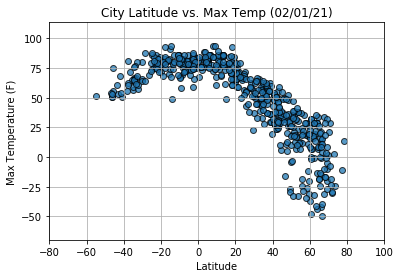

In [9]:
lat_temp = plot_scat(y='Max Temp',y_label='Max Temperature (F)')
lat_temp

## Latitude vs. Humidity Plot

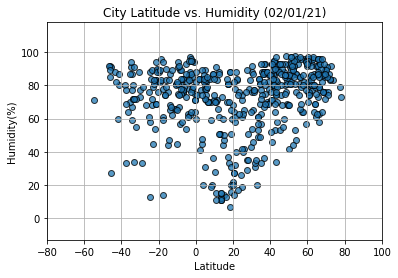

In [10]:
lat_humidity = plot_scat(y='Humidity',y_label='Humidity(%)')
lat_humidity

## Latitude vs. Cloudiness Plot

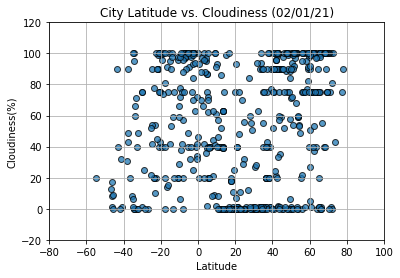

In [11]:
lat_cloud = plot_scat(y='Cloudiness',y_label='Cloudiness(%)')
lat_cloud

## Latitude vs. Wind Speed Plot

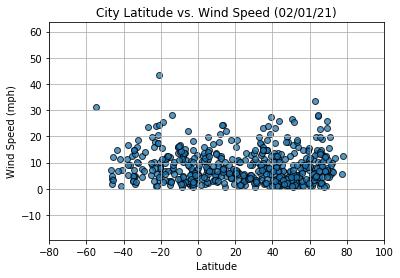

In [12]:
lat_wind = plot_scat(y='Wind Speed',y_label='Wind Speed (mph)')
lat_wind

## Linear Regression

In [23]:
north_hem = cleaned_df[cleaned_df['Lat'] >= 0]
south_hem = cleaned_df[cleaned_df['Lat'] < 0]

def plot_scat_north(y,y_label):
    lat_y = plt.scatter(north_hem['Lat'],north_hem[y],alpha=0.75,edgecolors='black')
    plt.title(f"City Latitude vs. {y} ({time.strftime('%m/%d/%y')})")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.xlim(-80,100)
    plt.ylim(min(north_hem[y])-20,max(north_hem[y])+20)
    plt.grid()
    vc_slope, vc_int, vc_r, vc_p, vc_std_err = stats.linregress(north_hem['Lat'], north_hem['Max Temp'])
    vc_fit = vc_slope * north_hem['Lat'] + vc_int
    plt.plot(north_hem['Lat'],vc_fit,'r',label='y={:.2f}x+{:.2f}'.format(vc_slope,vc_int))
    plt.legend(fontsize=9)
    plt.savefig(os.path.join('output_data',f'Latitude_vs_{y}.png'))
    
def plot_scat_south(y,y_label):
    lat_y = plt.scatter(south_hem['Lat'],south_hem[y],alpha=0.75,edgecolors='black')
    plt.title(f"City Latitude vs. {y} ({time.strftime('%m/%d/%y')})")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.xlim(-80,100)
    plt.ylim(min(south_hem[y])-20,max(south_hem[y])+20)
    plt.grid()
    vc_slope, vc_int, vc_r, vc_p, vc_std_err = stats.linregress(south_hem['Lat'], south_hem['Max Temp'])
    vc_fit = vc_slope * south_hem['Lat'] + vc_int
    plt.plot(south_hem['Lat'],vc_fit,'r',label='y={:.2f}x+{:.2f}'.format(vc_slope,vc_int))
    plt.legend(fontsize=9)
    plt.savefig(os.path.join('output_data',f'Latitude_vs_{y}.png'))

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

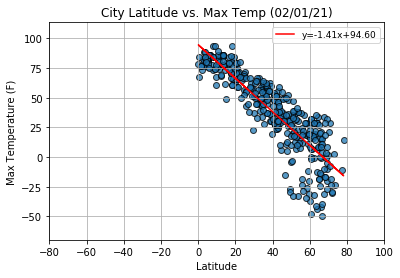

In [24]:
lat_temp_north = plot_scat_north(y='Max Temp',y_label='Max Temperature (F)')
lat_temp_north

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

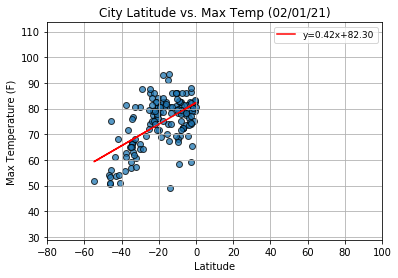

In [25]:
lat_temp_south = plot_scat_south(y='Max Temp',y_label='Max Temperature (F)')
lat_temp_south

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

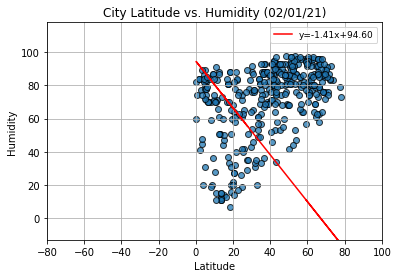

In [26]:
lat_hum_north = plot_scat_north(y='Humidity',y_label='Humidity')
lat_hum_north

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

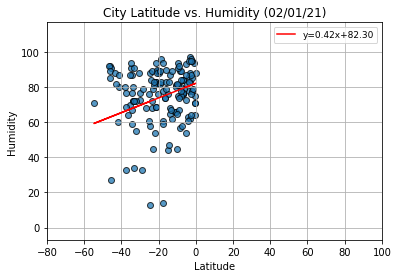

In [27]:
lat_hum_south = plot_scat_south(y='Humidity',y_label='Humidity')
lat_hum_south

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

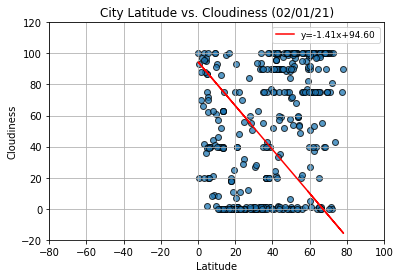

In [28]:
lat_cloud_north = plot_scat_north(y='Cloudiness',y_label='Cloudiness')
lat_cloud_north

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

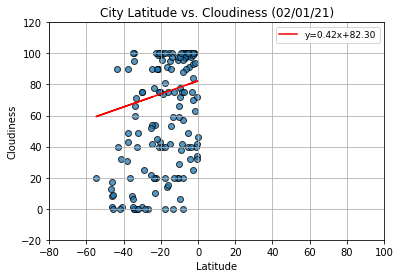

In [29]:
lat_cloud_south = plot_scat_south(y='Cloudiness',y_label='Cloudiness')
lat_cloud_south

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

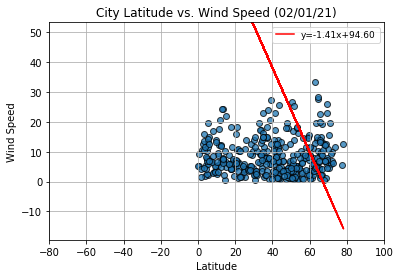

In [30]:
lat_cloud_north = plot_scat_north(y='Wind Speed',y_label='Wind Speed')
lat_cloud_north

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

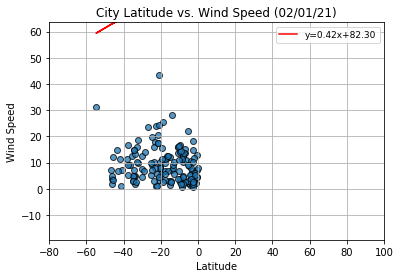

In [31]:
lat_cloud_south = plot_scat_south(y='Wind Speed',y_label='Wind Speed')
lat_cloud_south